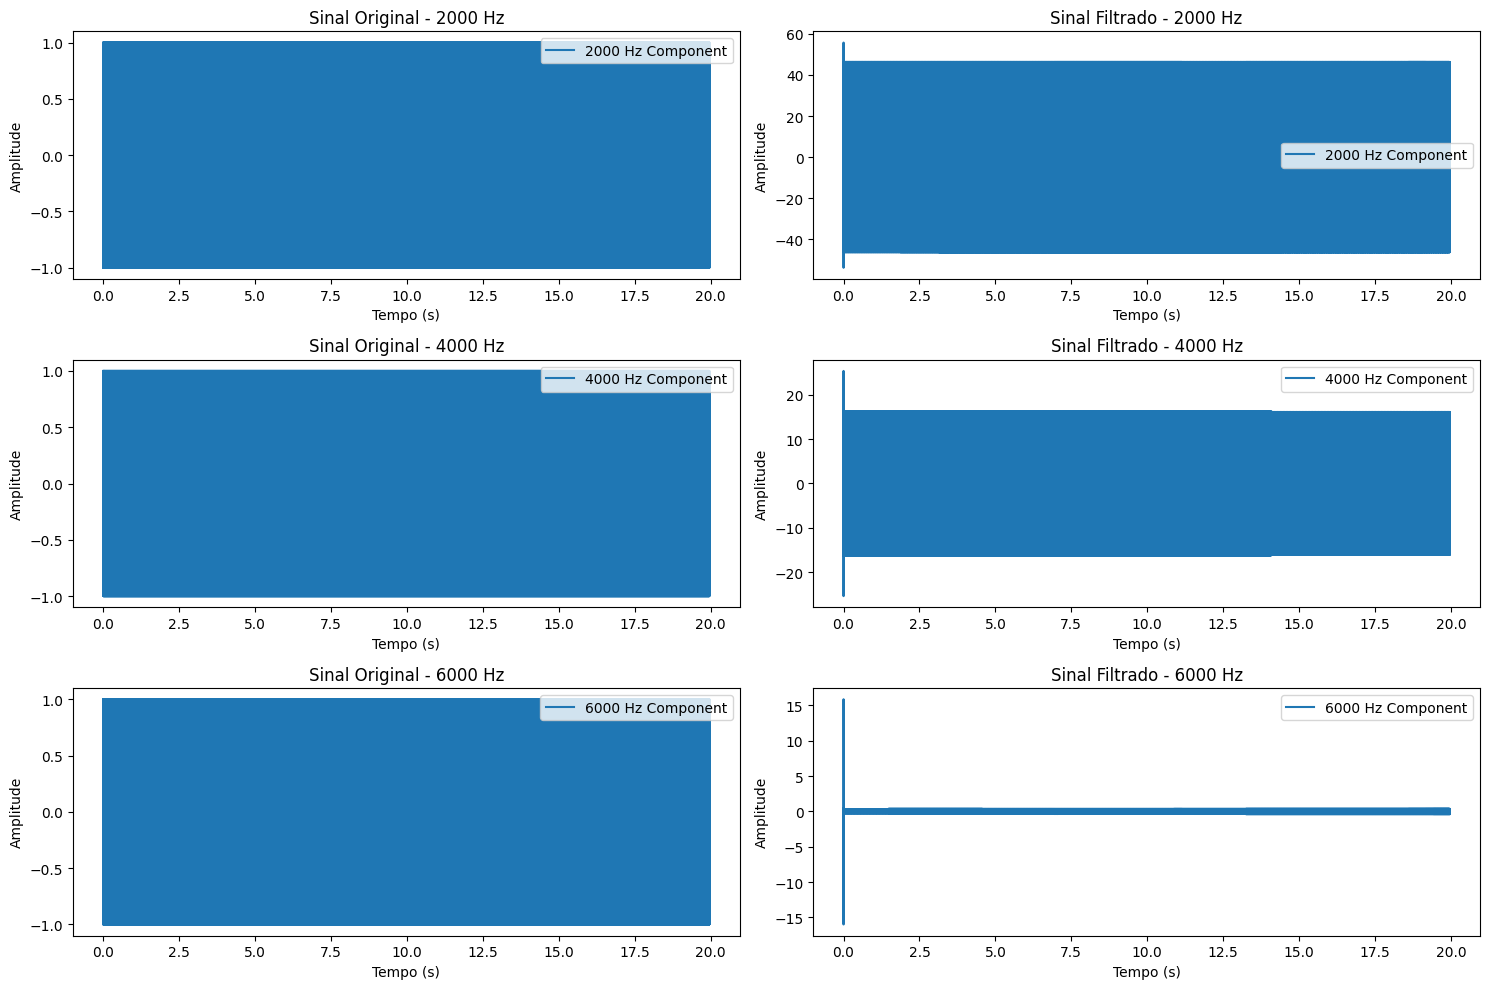

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter

# Função para projetar um filtro passa-banda
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Função para aplicar um filtro ao sinal
def apply_filter(data, b, a):
    return lfilter(b, a, data)

# Carrega um arquivo de áudio
file_path = '/content/gdrive/My Drive/GRADUAÇÃO/2023.1/Processamento Digital de Sinais/Componentes de Sinal /sinal_1.wav'
sampling_rate, audio_data = wavfile.read(file_path)

# Parâmetros dos filtros
filter_lowcut = 1500
filter_highcut = 2500

# Inicializa uma figura grande
plt.figure(figsize=(15, 10))

# Plota o sinal original e os sinais filtrados para cada componente
for i, frequency in enumerate([2000, 4000, 6000]):
    # Gera o sinal composto
    t, composite_signal = np.arange(0, len(audio_data))/sampling_rate, np.cos(2 * np.pi * frequency * np.arange(0, len(audio_data))/sampling_rate)

    # Projeta o filtro para a componente atual
    b, a = butter_bandpass(frequency - 500, frequency + 500, sampling_rate)

    # Aplica o filtro ao sinal original
    filtered_signal = apply_filter(audio_data, b, a)

    # Plota o sinal original
    plt.subplot(3, 2, i*2+1)
    plt.plot(t, composite_signal, label=f'{frequency} Hz Component')
    plt.title(f'Sinal Original - {frequency} Hz')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.legend()

    # Plota o sinal filtrado
    plt.subplot(3, 2, i*2+2)
    plt.plot(t, filtered_signal, label=f'{frequency} Hz Component')
    plt.title(f'Sinal Filtrado - {frequency} Hz')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Amplitude')
    plt.legend()

plt.tight_layout()
plt.show()
